In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [48]:
studentData = pd.read_csv("/Users/sana/Downloads/studentData.csv")

In [49]:
studentData.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
studentData.shape

(4424, 35)

In [10]:
studentData.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [50]:
studentData.rename(columns = {'Nacionality':'Nationality', 'Target': 'Status'}, inplace = True)

In [51]:
studentData.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Status
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [52]:
studentData.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [53]:
studentData.replace({'Status': {'Dropout':0, 'Graduate': 1, 'Enrolled': 2}}, inplace=True)

/var/folders/p9/p69vc0bn30l_8q_tmdsh64_40000gn/T/ipykernel_34500/2594929089.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  studentData.replace({'Status': {'Dropout':0, 'Graduate': 1, 'Enrolled': 2}}, inplace=True)


In [17]:
studentData.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Status
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [18]:
studentData["Status"].value_counts()

Status
1    2209
0    1421
2     794
Name: count, dtype: int64

In [19]:
correlation = studentData.corr()

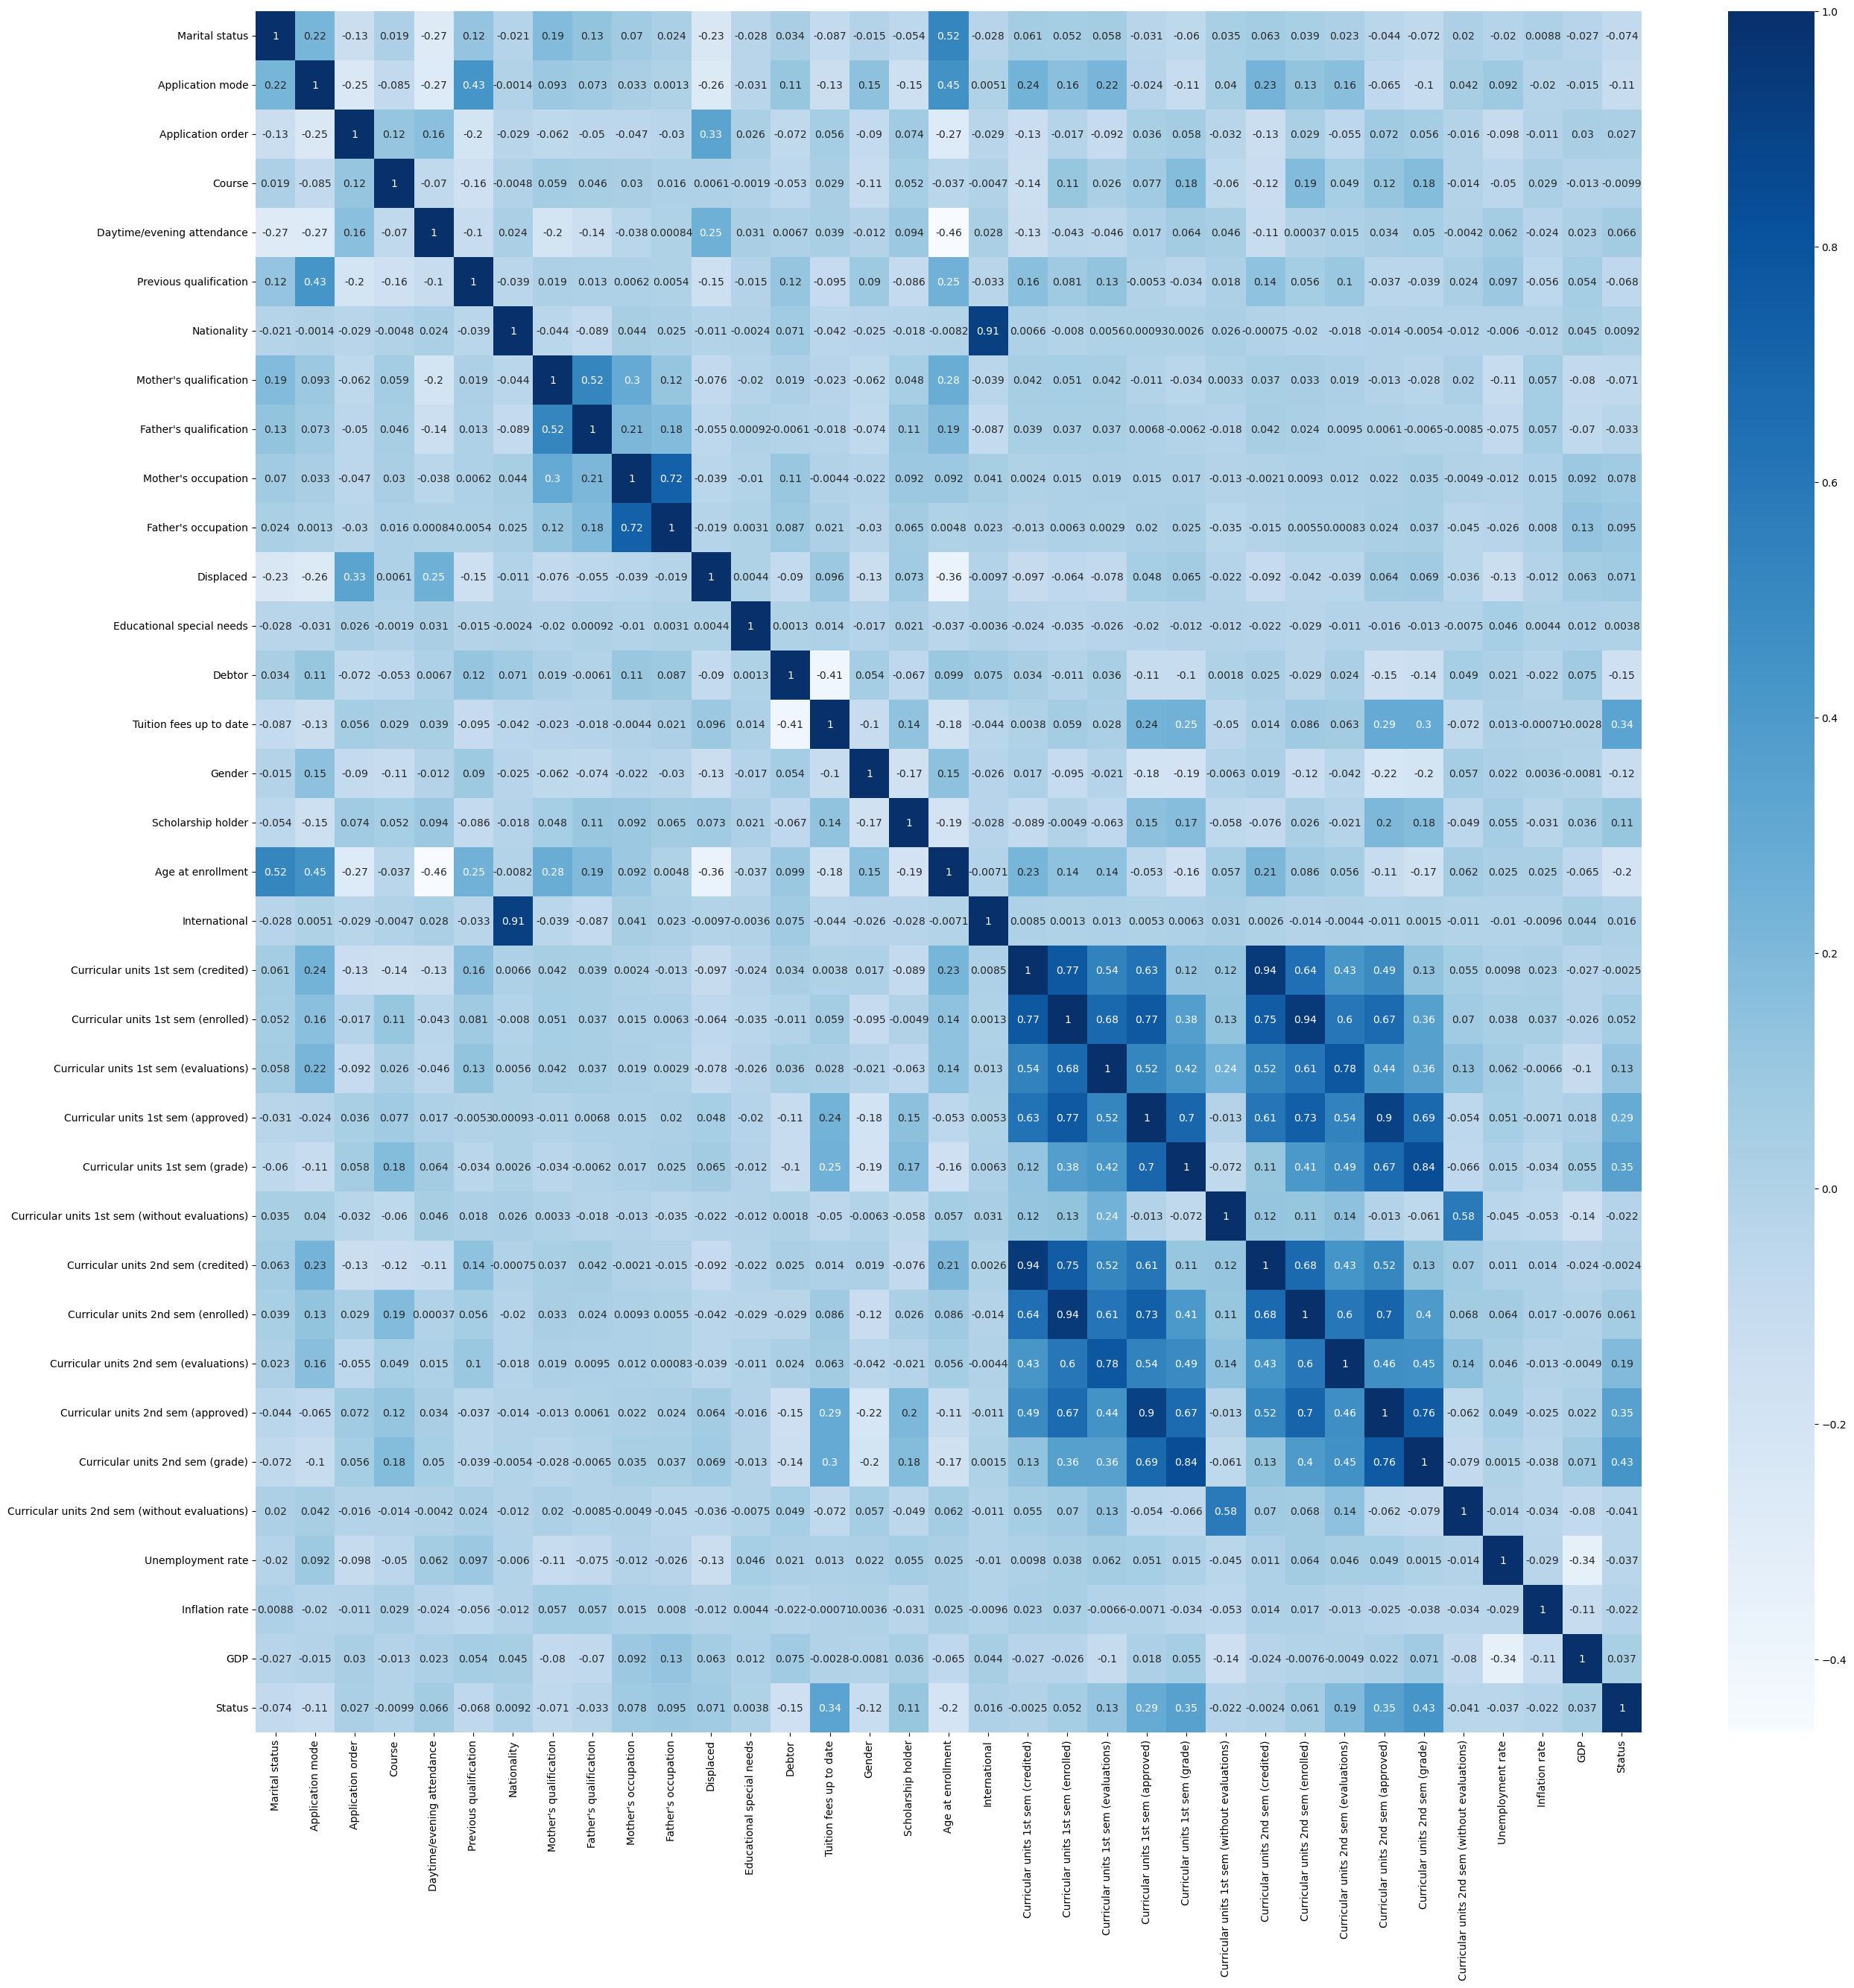

In [20]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation, annot=True, cmap = "Blues")
plt.show()

In [22]:
target = correlation["Status"]
top_10_features = target.abs().sort_values(ascending=False).drop("Status").head(10)
print(top_10_features)

Curricular units 2nd sem (grade)          0.429214
Curricular units 2nd sem (approved)       0.351135
Curricular units 1st sem (grade)          0.349652
Tuition fees up to date                   0.342121
Curricular units 1st sem (approved)       0.290243
Age at enrollment                         0.201806
Curricular units 2nd sem (evaluations)    0.194412
Debtor                                    0.154802
Curricular units 1st sem (evaluations)    0.125278
Gender                                    0.118454
Name: Status, dtype: float64


In [54]:
X = studentData[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)",
               "Tuition fees up to date", "Curricular units 1st sem (approved)", "Age at enrollment",
                "Curricular units 2nd sem (evaluations)", "Debtor", "Curricular units 1st sem (evaluations)",
                "Gender"]]
y = studentData["Status"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 
pca = PCA()
pca.fit(X_train_scaled)

PCA()

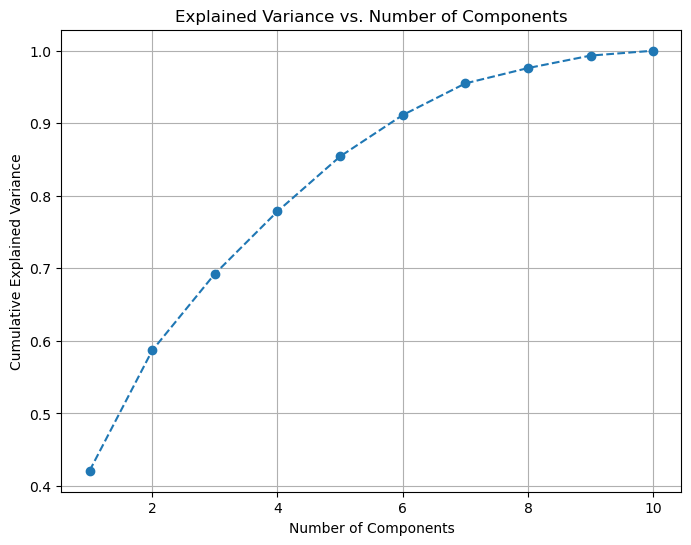

In [57]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [28]:
pca2 = PCA(n_components = 7)
X_train = pca2.fit_transform(X_train_scaled)
X_test = pca2.transform(X_test_scaled)

In [31]:
rfc = RandomForestClassifier()

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
rfc.fit(X_train, y_train)
first_prediction = rfc.predict(X_test)
print(accuracy_score(y_test, first_prediction))

0.7242937853107345


In [42]:
from sklearn.model_selection import GridSearchCV
rfcParams = {
    "n_estimators": [70, 80, 90, 100], 
    "max_depth": [2, 6, 8, 10],
    "min_samples_split": [10, 15, 20],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}
rfcSearch = GridSearchCV(rfc, rfcParams, cv=5)
rfcSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [70, 80, 90, 100]})

In [43]:
print(rfcSearch.best_params_)
print(rfcSearch.best_score_)

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
0.7544502513205316


In [44]:
rfc_2 = RandomForestClassifier(n_estimators=100, max_depth = 10, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 10)
rfc_2.fit(X_train, y_train)
pred2 = rfc_2.predict(X_test)
print(accuracy_score(pred2, y_test))

0.7480225988700565


In [66]:
dtc = DecisionTreeClassifier() 
dtcParams = {
    "criterion": ['gini', 'log_loss'],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ['sqrt', 'log2']
}
dtcSearch = GridSearchCV(dtc, dtcParams, cv=5)
dtcSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5]})

In [68]:
print(dtcSearch.best_params_)
print(dtcSearch.best_score_)

{'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 5}
0.7355193025355804
DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2',
                       min_samples_leaf=6, min_samples_split=5)


In [69]:
bagDT = BaggingClassifier(DecisionTreeClassifier(criterion = 'log_loss', max_depth =5, 
                                                 max_features='log2', min_samples_leaf = 6, min_samples_split = 5), 
                          n_estimators = 10)
bagDT.fit(X_train, y_train)
baggingPrediction = bagDT.predict(X_test)
bagAccuracy = accuracy_score(y_test, baggingPrediction)
print(bagAccuracy)

0.7389830508474576


In [71]:
import xgboost as xgb

In [73]:
xgb_Classifier = xgb.XGBClassifier(objective = "multi:softprob", tree_method='hist', eta=0.2, max_depth=4)
xgb_Classifier.fit(X_train, y_train)
xgbPrediction = xgb_Classifier.predict(X_test)
xgbAccuracy = accuracy_score(y_test, xgbPrediction)
print(xgbAccuracy)

0.7220338983050848


In [75]:
print(confusion_matrix(y_test, xgbPrediction))

[[229  45  42]
 [ 19 369  30]
 [ 39  71  41]]
